In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('data/covid-19-cases.csv')

In [3]:
grouped = df.groupby('Country/Region')
df_countries = grouped.sum()

In [4]:
def make_plot(country):
    """make the bar plot of case numbers and change in numbers line plot."""

    # extract the series corresponding to the case numbers for country
    c_df = df_countries.loc[country, df_countries.columns[4:]]

    # convert index to a proper datetime object
    c_df.index = pd.to_datetime(c_df.index)

    # get the number of column
    n = len(c_df)

    # setting bar with corresponding values
    plt.bar(range(n), c_df.values)

    # setting x and y label
    plt.xlabel('Days')
    plt.ylabel('Confirmed cases, $N$')

    # add a title reporting the latest number of cases available
    title = '{}\n{} cases on {}'.format(country, c_df[-1],
                                        c_df.index[-1].strftime('%d %B %Y'))
    plt.suptitle(title)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_21364\2113056561.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  c_df.index = pd.to_datetime(c_df.index)


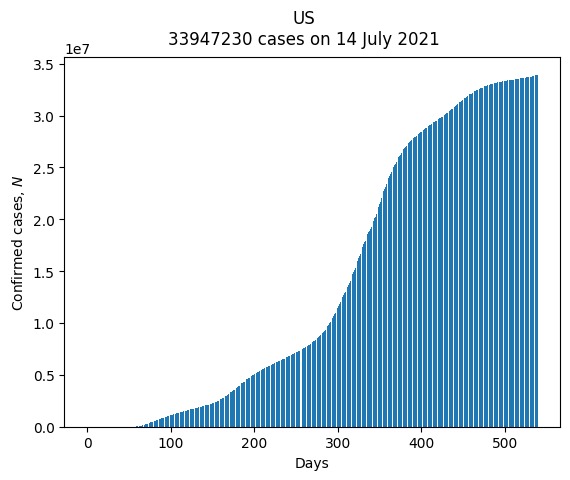

In [5]:
# make plot for a corresponding country
make_plot('US')
plot = plt.show()

In [6]:
def make_plot_regions(country):
    regions = df.groupby(['Country/Region', 'Province/State'])['Total Value'].sum()
    country_data = regions.loc[country]
    
    # Create the pie chart
    plt.figure(figsize=(10,5))
    patches, texts, autotexts = plt.pie(country_data, labels=None, autopct='%1.1f%%', pctdistance=1.2)
    plt.legend(patches, country_data.index, title="Province/State", loc="best")
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    
    # Adjust the position of the title
    plt.title('Total Cases by Province/State in {}'.format(country), y=1.08)
    
    plt.show()
    
    plt.close()


In [7]:
make_plot_regions('United Kingdom')

KeyError: 'Column not found: Total Value'

In [ ]:
def top_10_countries():
    df['Total Value'] = df.iloc[:, 3:].sum(axis=1)
    df_sorted = df.sort_values('Total Value', ascending=False)
    df_top10 = df_sorted.head(10)

    df_top10.set_index('Country/Region', inplace=True)

    # Plot a bar chart
    plt.figure(figsize=(10, 6))
    df_top10['Total Value'].plot(kind='barh')
    plt.title('Top 10 Countries with Highest Total Number of Covid-19 cases')
    plt.xlabel('Country')
    plt.ylabel('Total Cases')
    
    plt.show()
    
    plt.close()

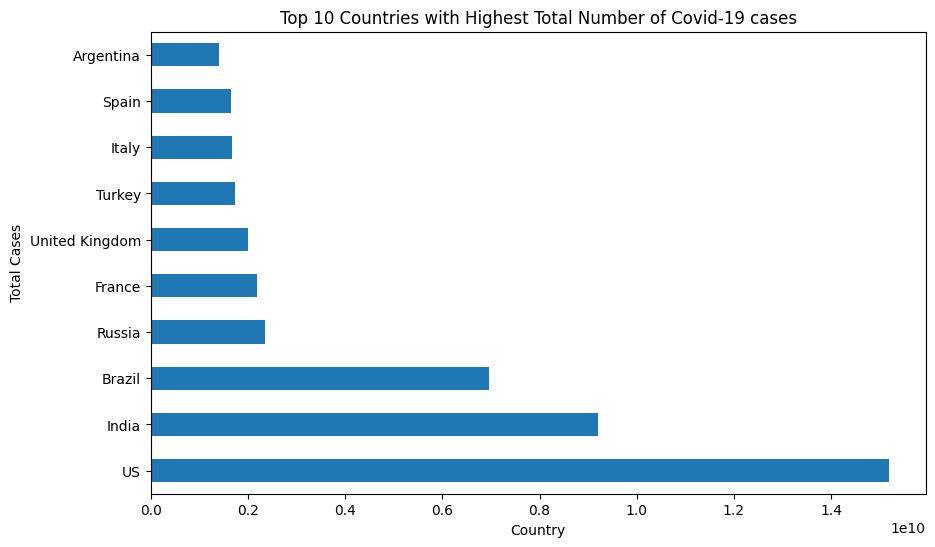

In [ ]:
top_10_countries()

In [ ]:
def make_multiple_plot():
    """Make the line plot of case numbers for multiple countries."""
    df_sorted = df.sort_values('Total Value', ascending=False)
    top_countries = df_sorted.head(3).iloc[:, 2]
    
    plt.figure(figsize=(10, 6))

    for country in top_countries:
        # Extract the series corresponding to the case numbers for country
        c_df = df_countries.loc[country, df_countries.columns[4:]]

        # Convert index to a proper datetime object
        c_df.index = pd.to_datetime(c_df.index)

        # Plot a line chart with corresponding values
        plt.plot(c_df.values, label=country)

    # Setting x and y label
    plt.xlabel('Days')
    plt.ylabel('Confirmed cases, $N$')
    plt.title('Total Cases for top 3 countries over time')

    # Add a legend
    plt.legend()
    plt.show()
    
    plt.close()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15400\1912623060.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  c_df.index = pd.to_datetime(c_df.index)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_15400\1912623060.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  c_df.index = pd.to_datetime(c_df.index)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_15400\1912623060.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  c_df.index = pd.to_datetime(c_df.index)


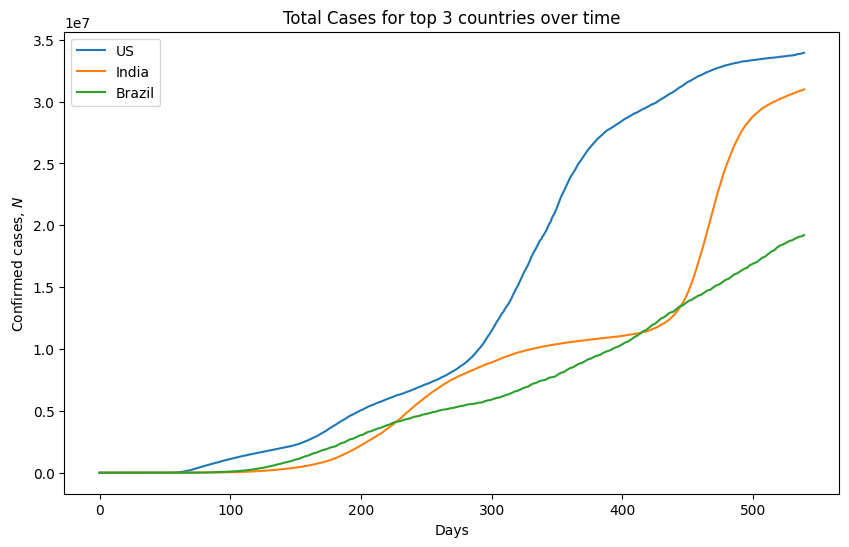

In [ ]:
make_multiple_plot()